# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = pd.DataFrame(app_train)
datamean = df['AMT_INCOME_TOTAL'].mean()
print ('The mean of AMT_INCOME_TOTAL is '+str(datamean))

datastd = df['AMT_INCOME_TOTAL'].std()
print ('The std of AMT_INCOME_TOTAL is '+str(datastd))

The mean of AMT_INCOME_TOTAL is 168797.9192969845
The std of AMT_INCOME_TOTAL is 237123.14627883647


In [7]:
datamean = df['AMT_CREDIT'].mean()
print ('The mean of AMT_CREDIT is '+str(datamean))

datastd = df['AMT_CREDIT'].std()
print ('The std of AMT_CREDIT is '+str(datastd))

The mean of AMT_CREDIT is 599025.9997057016
The std of AMT_CREDIT is 402490.776995946


In [38]:
new = app_train.loc[:1000, ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']]
new.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT
0,Cash loans,M,202500.0,406597.5
1,Cash loans,F,270000.0,1293502.5
2,Revolving loans,M,67500.0,135000.0
3,Cash loans,F,135000.0,312682.5
4,Cash loans,M,121500.0,513000.0


In [39]:
new.shape

(1001, 4)

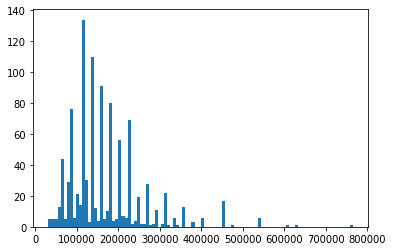

In [46]:
new['AMT_INCOME_TOTAL'].hist(grid=False, bins=100)

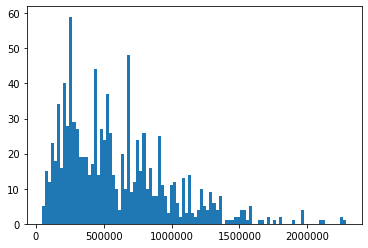

In [45]:
new['AMT_CREDIT'].hist(grid=False, bins = 100)

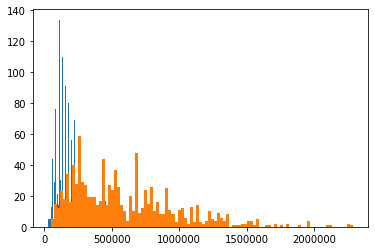

In [42]:
new['AMT_INCOME_TOTAL'].hist(grid=False, bins=100)
new['AMT_CREDIT'].hist(grid=False, bins = 100)

In [56]:
x = new.sort_values(by='AMT_INCOME_TOTAL', ascending=False).head(15)
x

,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT
319,Revolving loans,M,765000.0,1350000.0
332,Cash loans,F,630000.0,900000.0
391,Revolving loans,M,607500.0,1350000.0
632,Cash loans,M,540000.0,545040.0
51,Cash loans,M,540000.0,675000.0
622,Cash loans,M,540000.0,1575000.0
59,Cash loans,M,540000.0,1227901.5
930,Cash loans,F,540000.0,485640.0
701,Revolving loans,M,540000.0,900000.0
367,Cash loans,F,472500.0,1327648.5


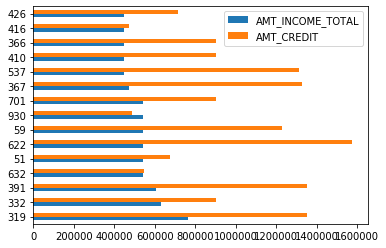

In [58]:
x.plot(kind = 'barh')